<h1>Analysis of Real data</h1>

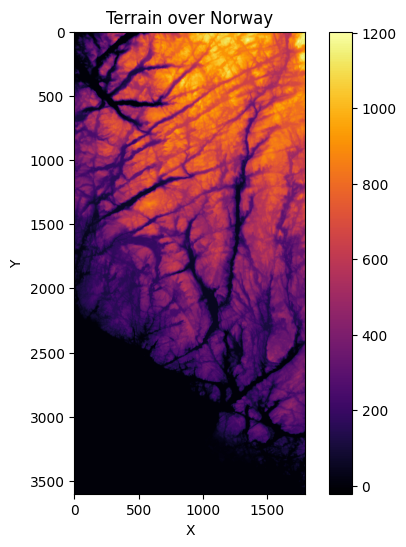

In [2]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from imageio import imread
import warnings
warnings.filterwarnings("ignore")


# Load the terrain
terrain1 = imread('/Users/hishem/Documents/GitHub/FYS-STK4155/Project1/Datafiles/SRTM_data_Norway_2.tif')
# Show the terrain
plt.figure(figsize=(6,6))
plt.title('Terrain over Norway')
plt.imshow(terrain1, cmap='inferno')
plt.xlabel('X')
plt.ylabel('Y')
plt.colorbar()
plt.show()

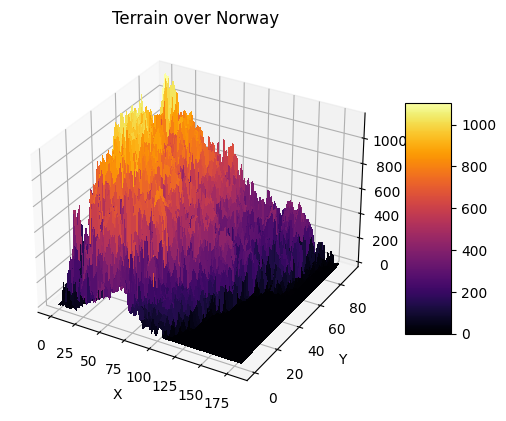

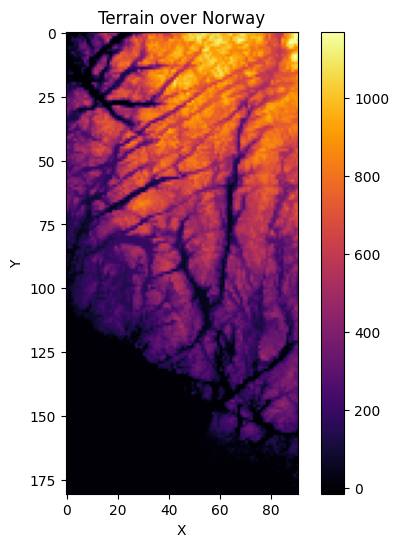

In [3]:
#downsize the terrain
z = terrain1[::20, ::20]

x = np.linspace(0, z.shape[0], int(z.shape[0]))
y = np.linspace(0, z.shape[1], int(z.shape[1]))
xm,ym = np.meshgrid(x,y,indexing='ij')


fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(projection = '3d')
# # Plot the surface.
surf = ax.plot_surface(xm, ym, z, cmap='inferno',linewidth=0, antialiased=False)
ax.set_zlim(np.min(z), np.max(z))

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Terrain over Norway')
# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()
plt.figure(figsize=(6,6))
plt.title('Terrain over Norway')
plt.imshow(z, cmap='inferno')
plt.xlabel('X')
plt.ylabel('Y')
plt.colorbar()
plt.show()

In [4]:
import functions as fun
import importlib
from tqdm import trange
importlib.reload(fun)

#OLS regression on the real terrain

degrees = np.arange(1,25)
# x = np.linspace(0, z.shape[0], int(z.shape[0]))
# y = np.linspace(0, z.shape[1], int(z.shape[1]))
# xm,ym = np.meshgrid(x,y,indexing='ij')

betas_un = []   
mse_un_test = []
mse_un_train = []
r2_un_test = []
r2_un_train = []

betas_sc = []
mse_sc_test = []
mse_sc_train = []
r2_sc_test = []
r2_sc_train = []



#OLS regression
for i in trange(len(degrees)):
    d = degrees[i]
    X = fun.X_design(x, y, d)
    z_flat = z.flatten()

    #OLS regression
    #unscaled data
    z_mod, z_mod_train, z_mod_test, beta, z_train, z_test = fun.OLS(X, z_flat, random_state=42)

    betas_un.append(beta)
    mse_un_test.append(mean_squared_error(z_mod_test, z_test))
    mse_un_train.append(mean_squared_error(z_mod_train, z_train))
    r2_un_test.append(r2_score(z_mod_test, z_test))
    r2_un_train.append(r2_score(z_mod_train, z_train))

    #scaled data
    z_mod_sc, z_mod_train_sc, z_mod_test_sc, beta_sc, z_train_sc, z_test_sc, scaler_X, scaler_z = fun.OLS(X, z_flat, random_state=42,scaled_data=True,standard_scaling=False,minmax_scaling=True)

    

    betas_sc.append(beta_sc)
    mse_sc_test.append(mean_squared_error(z_mod_test_sc, z_test_sc))
    mse_sc_train.append(mean_squared_error(z_mod_train_sc, z_train_sc))
    r2_sc_test.append(r2_score(z_mod_test_sc, z_test_sc))
    r2_sc_train.append(r2_score(z_mod_train_sc, z_train_sc))



100%|██████████| 24/24 [00:15<00:00,  1.55it/s]


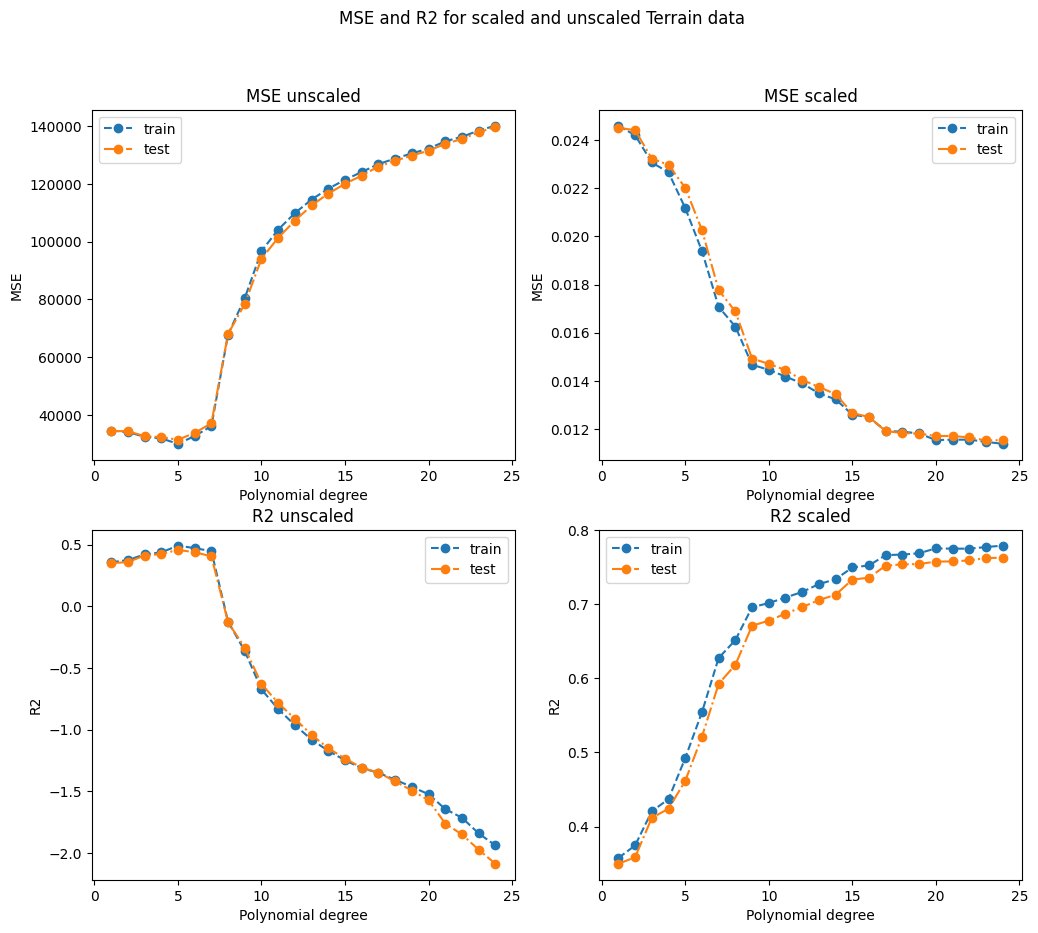

In [5]:
# Plot MSE and R2 for scaled and unscaled data

#4 subplots. Scaled and unscaled MSE and R2, for test and train

fig, axs = plt.subplots(2, 2, figsize=(12, 10))
fig.suptitle('MSE and R2 for scaled and unscaled Terrain data')
axs[0, 0].plot(degrees, mse_un_train,'--o', label='train')
axs[0, 0].plot(degrees, mse_un_test,'-.o', label='test')
axs[0, 0].set_title('MSE unscaled')
axs[0, 0].set_xlabel('Polynomial degree')
axs[0, 0].set_ylabel('MSE')
axs[0, 0].legend()
plt.grid()


axs[0, 1].plot(degrees, mse_sc_train,'--o', label='train')
axs[0, 1].plot(degrees, mse_sc_test,'-.o', label='test')
axs[0, 1].set_title('MSE scaled')
axs[0, 1].set_xlabel('Polynomial degree')
axs[0, 1].set_ylabel('MSE')
axs[0, 1].legend()
plt.grid()


axs[1, 0].plot(degrees, r2_un_train,'--o', label='train')
axs[1, 0].plot(degrees, r2_un_test,'-.o', label='test')
axs[1, 0].set_title('R2 unscaled')
axs[1, 0].set_xlabel('Polynomial degree')   
axs[1, 0].set_ylabel('R2')
axs[1, 0].legend()
plt.grid()


axs[1, 1].plot(degrees, r2_sc_train,'--o', label='train')
axs[1, 1].plot(degrees, r2_sc_test,'-.o', label='test')
axs[1, 1].set_title('R2 scaled')
axs[1, 1].set_xlabel('Polynomial degree')
axs[1, 1].set_ylabel('R2')
axs[1, 1].legend()

plt.grid()

plt.show()

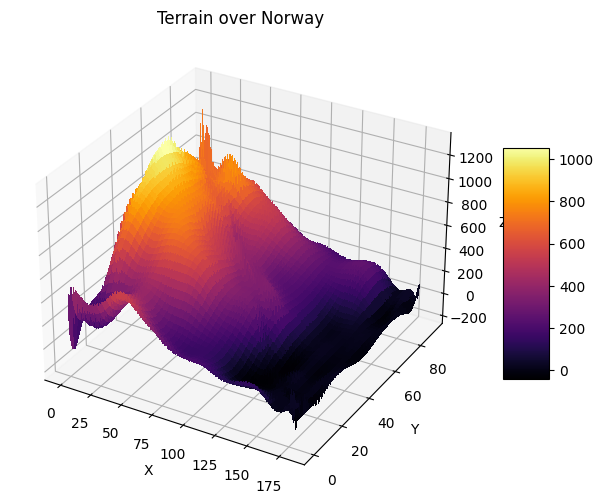

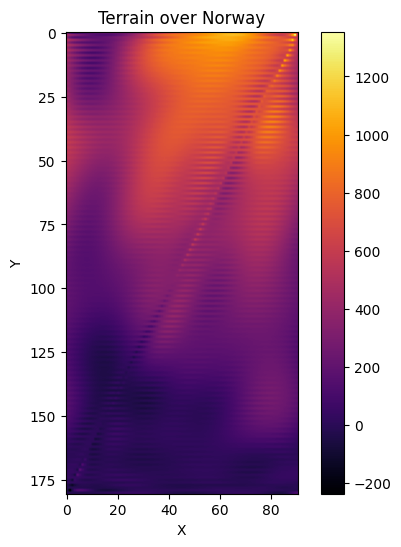

In [6]:


deg = 20
X = fun.X_design(x, y, deg)
z_flat = z.flatten()
z_mod, z_mod_train, z_mod_test, beta, z_train, z_test,scaler_X,scaler_z = fun.OLS(X, z_flat, random_state=42, scaled_data=True, standard_scaling=False, minmax_scaling=True)

#Unscale
z_mod = scaler_z.inverse_transform(z_mod.reshape(-1,1)).reshape(z.shape)    

z_pred = z_mod.reshape(z.shape)

# z_pred_train = z_mod_train.reshape(z.shape)
# z_pred_test = z_mod_test.reshape(z.shape)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(projection = '3d')
# # Plot the surface.
surf = ax.plot_surface(xm, ym, z_pred, cmap='inferno',linewidth=0, antialiased=False)
ax.set_zlim(np.min(z_pred), np.max(z_pred))

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Terrain over Norway')
# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()
plt.figure(figsize=(6,6))
plt.title('Terrain over Norway')
plt.imshow(z_pred, cmap='inferno')
plt.xlabel('X')
plt.ylabel('Y')
plt.colorbar()
plt.show()

<h1>Applying Ridge Regression</h1>

In [7]:
importlib.reload(fun)


lambdas = [1e-5,1e-4,1e-3,1e-2,1e-1,1]#np.logspace(-5, 1, nlambdas)
nlambdas = len(lambdas)


degrees = np.arange(1, 25)

mse_sc = np.zeros((nlambdas, len(degrees)+1,2))
mse_un = np.zeros((nlambdas, len(degrees)+1,2))
r2_sc = np.zeros((nlambdas, len(degrees)+1,2))
r2_un = np.zeros((nlambdas, len(degrees)+1,2))

for i in trange(len(degrees)):
    d = degrees[i]
    for i,lam in enumerate(lambdas):
        X = fun.X_design(x, y, d)
        z_flat = z.flatten()

        #unscaled data
        z_mod, z_mod_train, z_mod_test, beta, z_train, z_test = fun.Ridge(X, z_flat, lam, random_state=42)
        mse_un[i,d,0] = mean_squared_error(z_mod_test, z_test)
        mse_un[i,d,1] = mean_squared_error(z_mod_train, z_train)
        r2_un[i,d,0] = r2_score(z_mod_test, z_test)
        r2_un[i,d,1] = r2_score(z_mod_train, z_train)


        #scaled data
        z_mod_sc, z_mod_train_sc, z_mod_test_sc, beta_sc, z_train_sc, z_test_sc, scaler_X,scaler_z = fun.Ridge(X, z_flat, lam, random_state=42,scaled_data=True,standard_scaling=False,minmax_scaling=True)
        mse_sc[i,d,0] = mean_squared_error(z_mod_test_sc, z_test_sc)
        mse_sc[i,d,1] = mean_squared_error(z_mod_train_sc, z_train_sc)
        r2_sc[i,d,0] = r2_score(z_mod_test_sc, z_test_sc)
        r2_sc[i,d,1] = r2_score(z_mod_train_sc, z_train_sc)

100%|██████████| 24/24 [00:47<00:00,  1.99s/it]


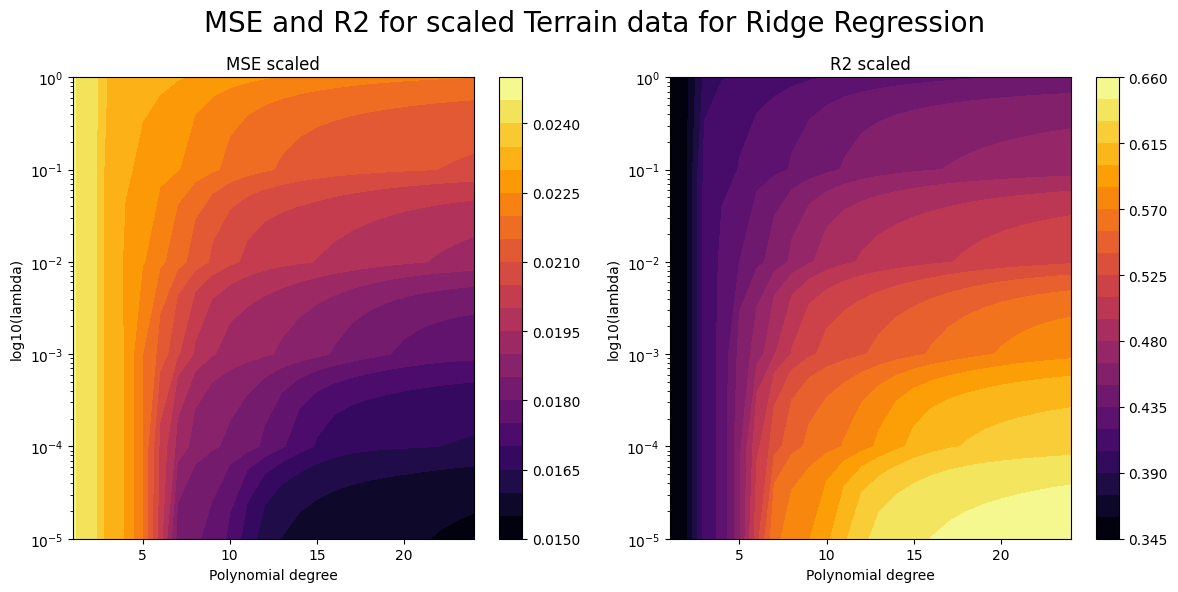

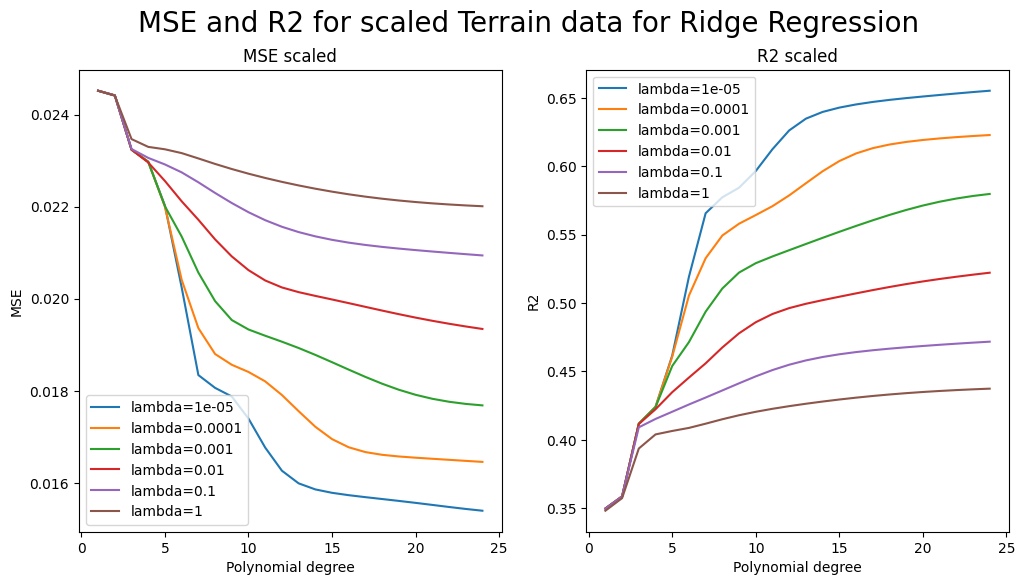

In [8]:
# # Heatmap plot for MSE and R2 for scaled 

#Subplots for MSE and R2 for scaled heatmap
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle('MSE and R2 for scaled Terrain data for Ridge Regression',fontsize=20)


#plot MSE scaled
mappable0 = axs[0].contourf(degrees, lambdas, mse_sc[:, 1:, 0], cmap='inferno', levels=20)
axs[0].set_title('MSE scaled')
axs[0].set_xlabel('Polynomial degree')
axs[0].set_ylabel('log10(lambda)')
fig.colorbar(mappable0, ax=axs[0])
axs[0].set_yscale('log')

#plot R2 scaled
mappable1 = axs[1].contourf(degrees, lambdas, r2_sc[:, 1:, 0], cmap='inferno', levels=20)
axs[1].set_title('R2 scaled')
axs[1].set_xlabel('Polynomial degree')
axs[1].set_ylabel('log10(lambda)')
fig.colorbar(mappable1, ax=axs[1])
axs[1].set_yscale('log')

plt.tight_layout()
plt.show()



fig, axs = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle('MSE and R2 for scaled Terrain data for Ridge Regression',fontsize=20)

for i in range(nlambdas):
    axs[0].plot(degrees, mse_sc[i,1:,0], label=f'lambda={lambdas[i]}')
    axs[1].plot(degrees, r2_sc[i,1:,0], label=f'lambda={lambdas[i]}')

axs[0].set_title('MSE scaled')
axs[0].set_xlabel('Polynomial degree')
axs[0].set_ylabel('MSE')
axs[0].legend()
plt.grid()

axs[1].set_title('R2 scaled')
axs[1].set_xlabel('Polynomial degree')
axs[1].set_ylabel('R2')
axs[1].legend()
plt.grid()

plt.show()




<h1>Lasso Regression</h1>

In [9]:
importlib.reload(fun)

#To save computational time, scaled data only. Since we know that scaling is beneficial

lambdas = [1e-5,1e-4,1e-3,1e-2,1e-1,1]#np.logspace(-5, 1, nlambdas)
nlambdas = len(lambdas)


degrees = np.arange(1, 20)

mse_sc = np.zeros((nlambdas, len(degrees)+1,2))
r2_sc = np.zeros((nlambdas, len(degrees)+1,2))


for i in trange(len(degrees)):
    d = degrees[i]
    for i,lam in enumerate(lambdas):
        X = fun.X_design(x, y, d)
        z_flat = z.flatten()

        #scaled data
        z_mod_sc, z_mod_train_sc, z_mod_test_sc, beta_sc, z_train_sc, z_test_sc, scaler_X,scaler_z = fun.Lasso(X, z_flat, lam, random_state=42,scaled_data=True,standard_scaling=False,minmax_scaling=True)
        mse_sc[i,d,0] = mean_squared_error(z_mod_test_sc, z_test_sc)
        mse_sc[i,d,1] = mean_squared_error(z_mod_train_sc, z_train_sc)
        r2_sc[i,d,0] = r2_score(z_mod_test_sc, z_test_sc)
        r2_sc[i,d,1] = r2_score(z_mod_train_sc, z_train_sc)

100%|██████████| 19/19 [04:22<00:00, 13.81s/it]


[1e-05, 0.0001, 0.001, 0.01, 0.1, 1]


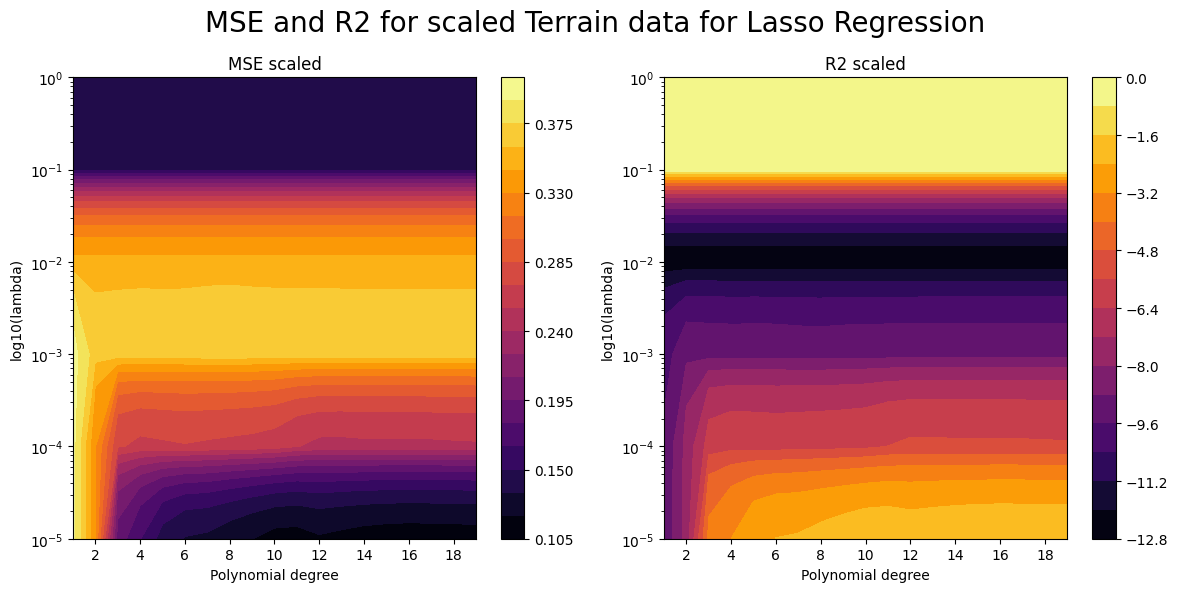

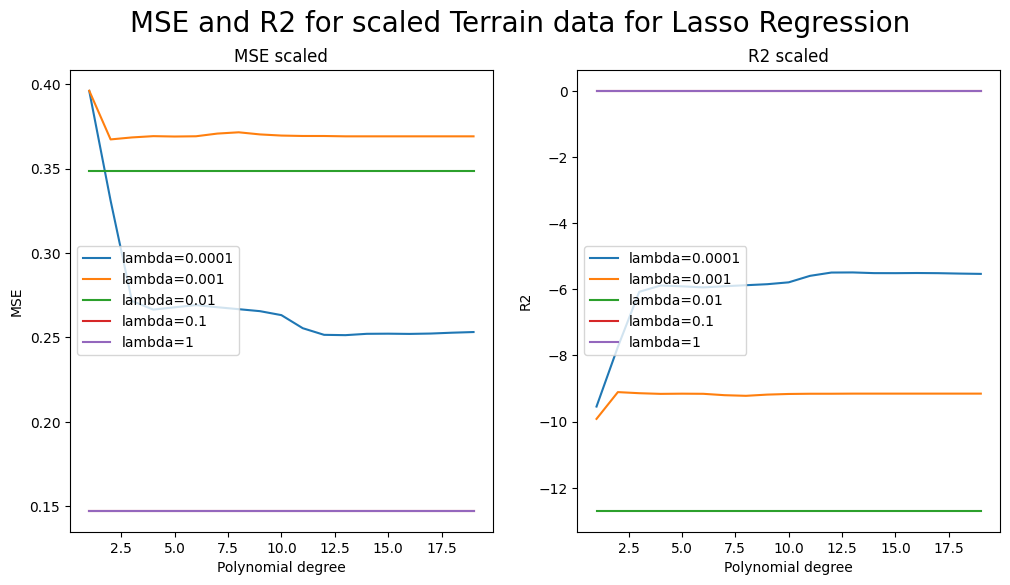

In [10]:
# # Heatmap plot for MSE and R2 for scaled 

#Subplots for MSE and R2 for scaled heatmap
fig, axs = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle('MSE and R2 for scaled Terrain data for Lasso Regression',fontsize=20)

print(lambdas)
#plot MSE scaled
mappable0 = axs[0].contourf(degrees, lambdas, mse_sc[:, 1:, 0], cmap='inferno', levels=20)
axs[0].set_title('MSE scaled')
axs[0].set_xlabel('Polynomial degree')
axs[0].set_ylabel('log10(lambda)')
fig.colorbar(mappable0, ax=axs[0])
axs[0].set_yscale('log')

#plot R2 scaled
mappable1 = axs[1].contourf(degrees, lambdas, r2_sc[:, 1:, 0], cmap='inferno', levels=20)
axs[1].set_title('R2 scaled')
axs[1].set_xlabel('Polynomial degree')
axs[1].set_ylabel('log10(lambda)')
fig.colorbar(mappable1, ax=axs[1])
axs[1].set_yscale('log')

plt.tight_layout()
plt.show()



fig, axs = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle('MSE and R2 for scaled Terrain data for Lasso Regression',fontsize=20)

for i in range(1,nlambdas):
    axs[0].plot(degrees, mse_sc[i,1:,0], label=f'lambda={lambdas[i]}')
    axs[1].plot(degrees, r2_sc[i,1:,0], label=f'lambda={lambdas[i]}')

axs[0].set_title('MSE scaled')
axs[0].set_xlabel('Polynomial degree')
axs[0].set_ylabel('MSE')
axs[0].legend()
plt.grid()

axs[1].set_title('R2 scaled')
axs[1].set_xlabel('Polynomial degree')
axs[1].set_ylabel('R2')
axs[1].legend()
plt.grid()

plt.show()



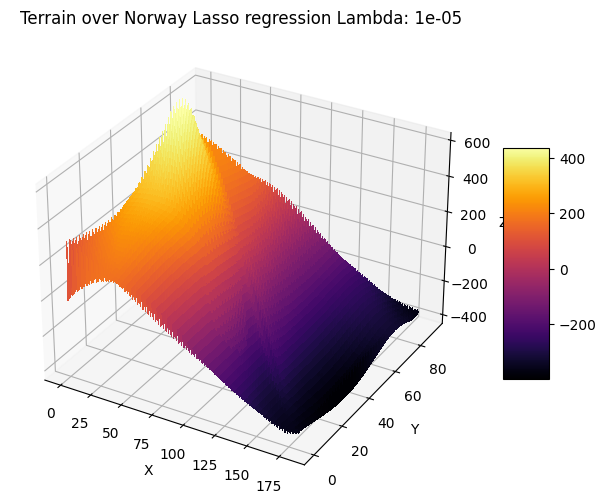

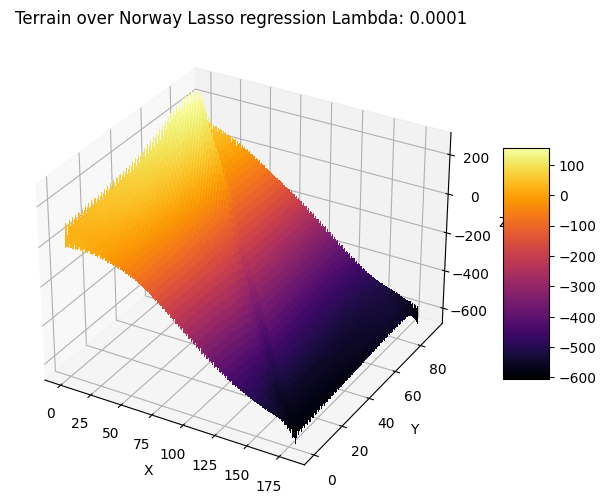

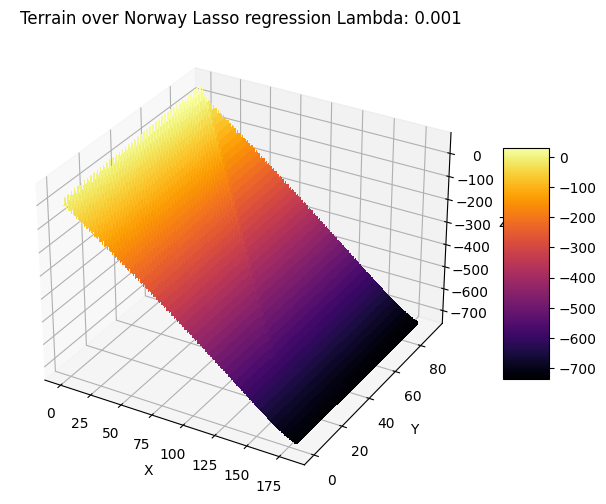

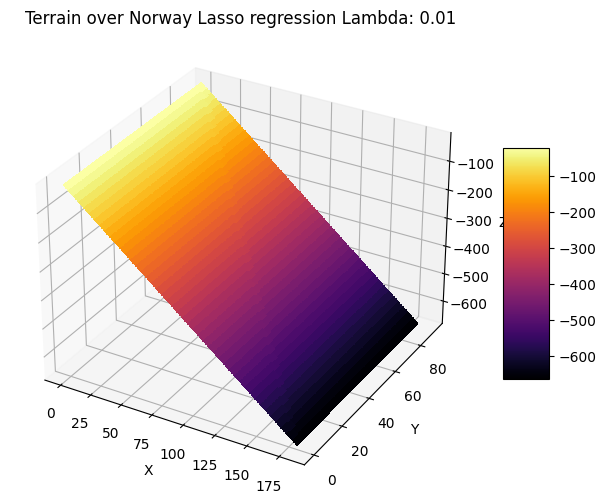

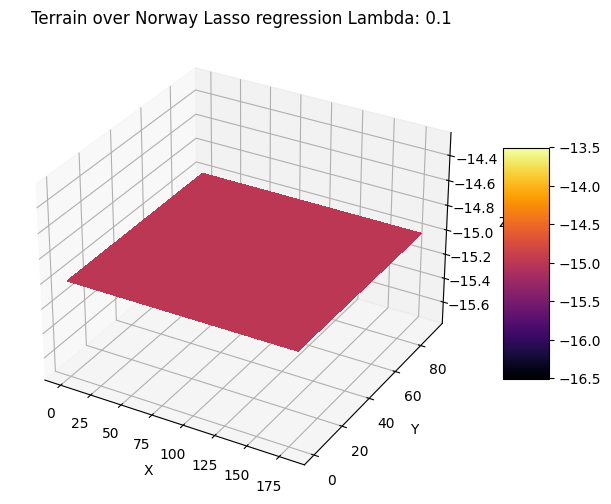

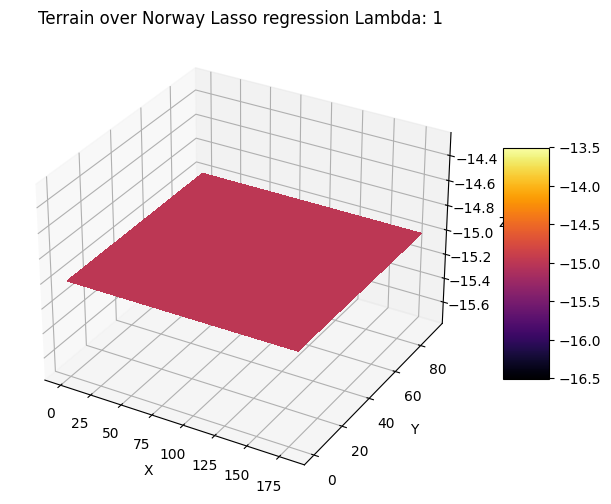

In [11]:
deg = 20

X = fun.X_design(x, y, deg)

z_flat = z.flatten()

lambdas = [1e-5,1e-4,1e-3,1e-2,1e-1,1]


for i,lam in enumerate(lambdas):
    z_mod_sc, z_mod_train_sc, z_mod_test_sc, beta_sc, z_train_sc, z_test_sc, scaler_X,scaler_z = fun.Lasso(X, z_flat, lam, random_state=42,scaled_data=True,standard_scaling=False,minmax_scaling=True)
    z_mod = scaler_z.inverse_transform(z_mod_sc.reshape(-1,1)).reshape(z.shape)    
    
    #plot the terrain

    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(projection = '3d')
    # # Plot the surface.
    surf = ax.plot_surface(xm, ym, z_mod, cmap='inferno',linewidth=0, antialiased=False)
    ax.set_zlim(np.min(z_mod), np.max(z_mod))
    
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(f'Terrain over Norway Lasso regression Lambda: {lam}')
    # Add a color bar which maps values to colors.
    fig.colorbar(surf, shrink=0.5, aspect=5)
    plt.show()



<h1>Bias - Varince Tradeoff</h1>

100%|██████████| 10/10 [00:04<00:00,  2.11it/s]


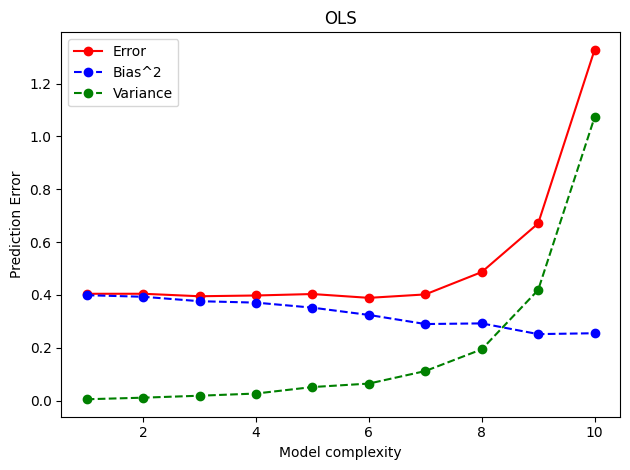

Degree of lowest error: 5
Lowest error: 0.3891050361733004


In [12]:
importlib.reload(fun)
from tqdm import trange
from sklearn.utils import resample

n_boostraps = 150
maxdegree = 11
batch_size = 250


polydegree = np.zeros(maxdegree)
error = np.zeros_like(polydegree)
bias = np.zeros_like(polydegree)
variance = np.zeros_like(polydegree)

for degree in trange(1, maxdegree):
    X = fun.X_design(x, y, degree)
    polydegree[degree] = degree

    error[degree], bias[degree], variance[degree] = fun.bias_variance_tradeoff(X, z_flat, n_boostraps,batch_size,scaling = True, standard_scaling=False, minmax_scaling=True)

plt.plot(polydegree[1:],error[1:], '-o',label='Error',color='red')
plt.plot(polydegree[1:], bias[1:],'--o', label='Bias^2',color='blue')
plt.plot(polydegree[1:], variance[1:],'--o', label='Variance',color='green')
plt.title('Bias-variance tradeoff')
plt.title('OLS')
plt.xlabel('Model complexity')
plt.ylabel('Prediction Error')
plt.legend()
plt.tight_layout()
plt.show()

#print degree of lowest error   
print('Degree of lowest error:',np.argmin(error[1:]))
print('Lowest error:',np.min(error[1:]))


<h1>Cross Val Score</h1>

In [76]:
importlib.reload(fun)

k = np.arange(5, 11)

# degrees = np.arange(5, 11)
d = 25

mse = np.zeros((len(k), 3))

best_mse_ols, best_mse_ridge, best_mse_lasso = np.inf, np.inf, np.inf
best_k_ols, best_degree_ols = None, None
best_k_ridge, best_degree_ridge = None, None
best_k_lasso, best_degree_lasso = None, None

modelOLS = []
modelRidge = []
modelLasso = []
predOLS = []
predRidge = []
predLasso = []
m = 0
# for d in degrees:
for i in trange(len(k)):
    X = fun.X_design(x, y, d)
    z_flat = z.flatten()

    print(f"Degree: {d}, k: {k[i]}")
    ols_pred, ols, ols_full  = fun.kfold('OLS',X, z_flat, k[i], scaling=True, standard_scaling=False, minmax_scaling=True)
    ridge_pred, ridge, ridge_full = fun.kfold('Ridge',X, z_flat, k[i], scaling=True, standard_scaling=False, minmax_scaling=True, lam=1e-5)
    lasso_pred, lasso, lasso_full = fun.kfold('Lasso',X, z_flat, k[i], scaling=True, standard_scaling=False, minmax_scaling=True, lam=1e-5)


    mse[i,0] = np.mean(ols)
    mse[i,1] = np.mean(ridge)
    mse[i,2] = np.mean(lasso)

    predOLS.append(ols_pred)
    predRidge.append(ridge_pred)
    predLasso.append(lasso_pred)
    modelOLS.append(ols_full)
    modelRidge.append(ridge_full)
    modelLasso.append(lasso_full)
    


    if mse[i,0] < best_mse_ols:
        best_mse_ols = mse[i,0]
        best_k_ols = k[i]
        best_degree_ols = d
    
    if mse[i,1] < best_mse_ridge:
        best_mse_ridge = mse[i,1]
        best_k_ridge = k[i]
        best_degree_ridge = d
    
    if mse[i,2] < best_mse_lasso:
        best_mse_lasso = mse[i,2]
        best_k_lasso = k[i]
        best_degree_lasso = d

print(f"Best OLS: MSE = {best_mse_ols}, k = {best_k_ols}, degree = {best_degree_ols}")
print(f"Best Ridge: MSE = {best_mse_ridge}, k = {best_k_ridge}, degree = {best_degree_ridge}")
print(f"Best Lasso: MSE = {best_mse_lasso}, k = {best_k_lasso}, degree = {best_degree_lasso}")


  0%|          | 0/6 [00:00<?, ?it/s]

Degree: 25, k: 5


 17%|█▋        | 1/6 [04:32<22:44, 272.90s/it]

Degree: 25, k: 6


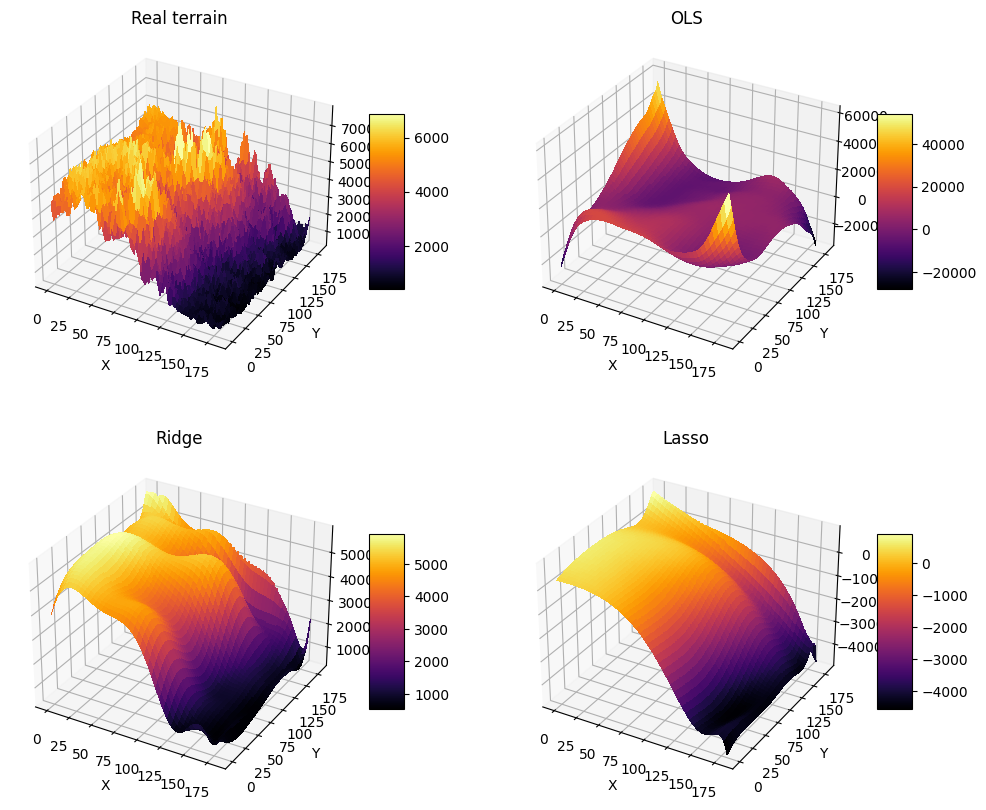

In [78]:
%matplotlib inline
lassomodel = modelLasso[np.argmin(mse[:,2])]
ridgemodel = modelRidge[np.argmin(mse[:,1])]
olsmodel = modelOLS[np.argmin(mse[:,0])]

#plot the surface terrain as well as the real in a 3D plot
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(221, projection='3d')
ax2 = fig.add_subplot(222, projection='3d')
ax3 = fig.add_subplot(223, projection='3d')
ax4 = fig.add_subplot(224, projection='3d')


surf1 = ax.plot_surface(xm, ym, z, cmap='inferno',linewidth=0, antialiased=False)
ax.set_zlim(np.min(z), np.max(z))
ax.set_title('Real terrain')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
fig.colorbar(surf1, shrink=0.5, aspect=5)

olsmodel = olsmodel.reshape(z.shape)    
# Plot the surface.
surf2 = ax2.plot_surface(xm, ym, olsmodel, cmap='inferno',linewidth=0, antialiased=False)
ax2.set_zlim(np.min(olsmodel), np.max(olsmodel))
ax2.set_title('OLS')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')
fig.colorbar(surf2, shrink=0.5, aspect=5)

ridgemodel = ridgemodel.reshape(z.shape)
# Plot the surface.
surf3 = ax3.plot_surface(xm, ym, ridgemodel, cmap='inferno',linewidth=0, antialiased=False)
ax3.set_zlim(np.min(ridgemodel), np.max(ridgemodel))
ax3.set_title('Ridge')
ax3.set_xlabel('X')
ax3.set_ylabel('Y')
ax3.set_zlabel('Z')

fig.colorbar(surf3, shrink=0.5, aspect=5)

lassomodel = lassomodel.reshape(z.shape)
# Plot the surface.
surf4 = ax4.plot_surface(xm, ym, lassomodel, cmap='inferno',linewidth=0, antialiased=False)
ax4.set_zlim(np.min(lassomodel), np.max(lassomodel))
ax4.set_title('Lasso')
ax4.set_xlabel('X')
ax4.set_ylabel('Y')
ax4.set_zlabel('Z')
fig.colorbar(surf4, shrink=0.5, aspect=5)

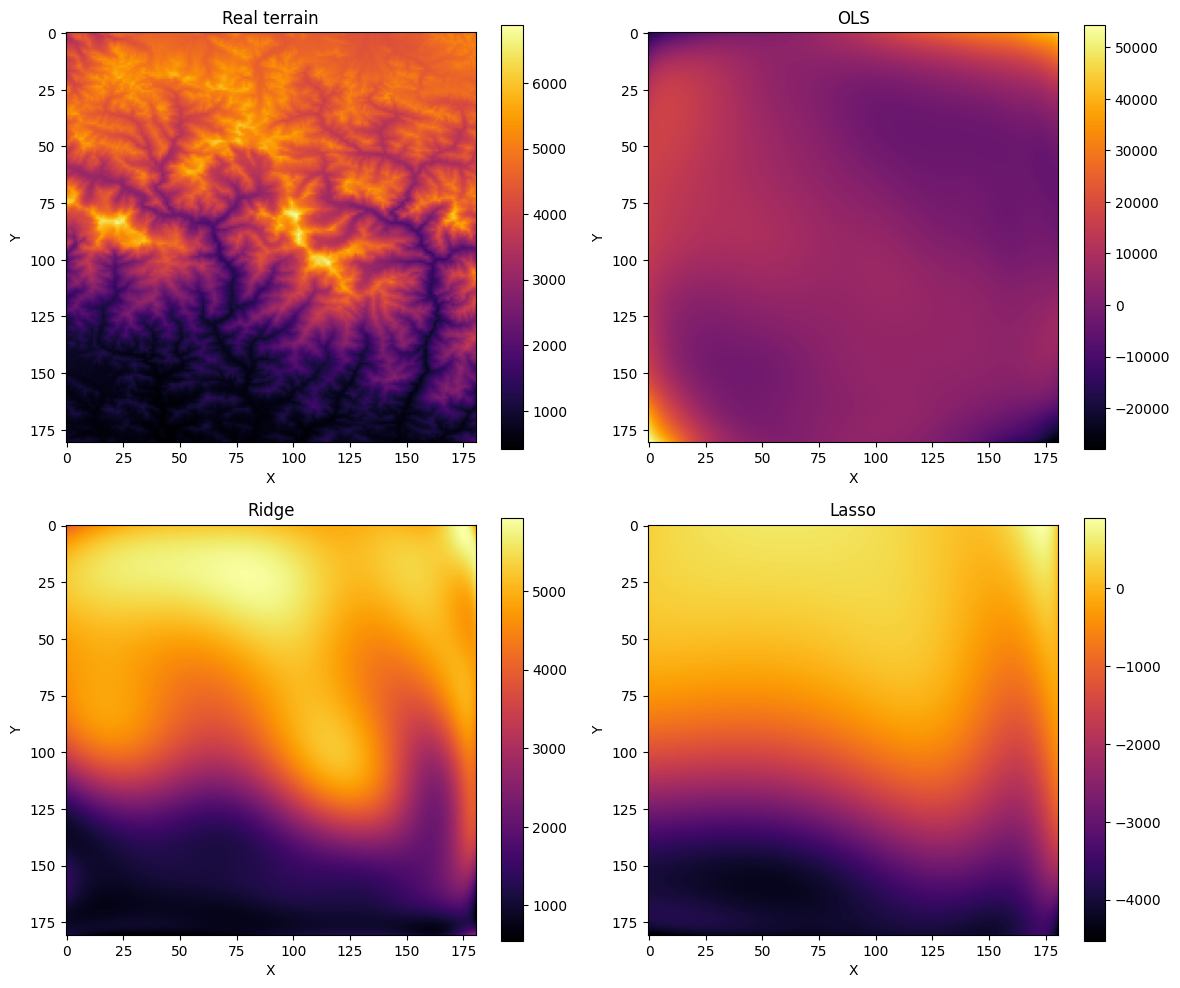

In [79]:
#Heatmap plot for the same as above
#plot the surface terrain as well as the real in a heatmap
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

ax.imshow(z, cmap='inferno')
ax.set_title('Real terrain')
ax.set_xlabel('X')
ax.set_ylabel('Y')
fig.colorbar(surf1, ax=ax)

ax2.imshow(olsmodel, cmap='inferno')
ax2.set_title('OLS')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
fig.colorbar(surf2, ax=ax2)

ax3.imshow(ridgemodel, cmap='inferno')
ax3.set_title('Ridge')
ax3.set_xlabel('X')
ax3.set_ylabel('Y')
fig.colorbar(surf3, ax=ax3)

ax4.imshow(lassomodel, cmap='inferno')
ax4.set_title('Lasso')
ax4.set_xlabel('X')
ax4.set_ylabel('Y')
fig.colorbar(surf4, ax=ax4)

plt.tight_layout()
plt.show()